In [1]:
import logging
from pathlib import Path

from astropy.coordinates import SkyCoord
from astropy.visualization import simple_norm
from IPython.display import HTML
from matplotlib import animation
from matplotlib import pyplot as plt
from rich.logging import RichHandler
from statix.exposure import Exposure
from statix.plotting import plot_image, plot_lightcurve

plt.style.use("Solarize_Light2")

logging.basicConfig(level=logging.INFO, format="%(message)s", handlers=[RichHandler()])
data_path = Path(".", "data")


def source_marker(ax, coords):
    ax.scatter(*coords, marker="o", edgecolor="w", s=100, c="none", linewidths=2, ls=":")

SAS has not been initialized in your system!
SAS-related functions not available!!!
SAS has not been initialized in your system!
SAS-related functions not available!!!


In [2]:
event_list_path = data_path / "pnevt.fits"
attitude_path = data_path / "att.fits"
xmmexp = Exposure(event_list_path, attitude_path)

# Transient source used as input for the simulation
ssc = SkyCoord(0, 0, unit="deg")
spc = ssc.to_pixel(xmmexp.image.wcs)

xmmexp

Exp.ID: S003 [EPN camera], Obs.ID: 0000000000
Energy band for products: SOFT (0.5-2.0 keV)
Nominal pointing: 00h00m00s +00d00m00s
PA: 90.0 deg

In [3]:
srclist_emldet = xmmexp.detect_sources(method="emldetect", likemin=6)

[02/10/23 18:48:02] INFO     Detecting sources using emldetect algorithm...                          ]8;id=889210;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=6068;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#82\82]8;;\

                    WARNING  Loading previous emldetect run.                                ]8;id=998288;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=462720;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#513\513]8;;\

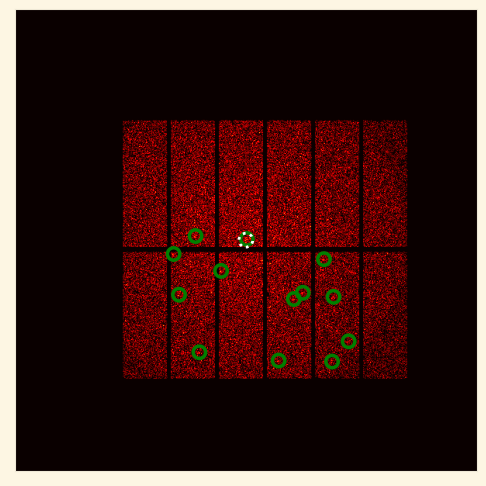

In [4]:
mask_detections = srclist_emldet["EP_DET_ML"] > 6
detections = srclist_emldet[mask_detections]

fig = plt.figure(figsize=(6, 6))
ax = plt.subplot(111)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)
plt.show()

In [5]:
srclist_msvst2d, image_msvst = xmmexp.detect_sources(method="msvst2d", sigma_level=3)

[02/10/23 18:48:03] INFO     Detecting sources using msvst2d algorithm...                            ]8;id=54510;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=637149;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#82\82]8;;\

                    INFO     Filling image gaps...                                           ]8;id=720297;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=228863;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#80\80]8;;\

[02/10/23 18:48:19] INFO     Denoising image using 2D MSVST...                               ]8;id=177932;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=364391;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#83\83]8;;\

[02/10/23 18:48:23] INFO     Finding peaks in denoised image...                              ]8;id=486668;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=206020;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#91\91]8;;\

                    INFO     Extracting counts for 175 sources...                           ]8;id=978464;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=889315;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#112\112]8;;\

                    INFO     Calculating background image                                           ]8;id=924021;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=533667;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#238\238]8;;\

[02/10/23 18:48:26] INFO     Extracting light-curves...                                               ]8;id=721689;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=900183;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[02/10/23 18:48:27] INFO     Calculating fluxes...                                          ]8;id=595955;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=270846;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#117\117]8;;\

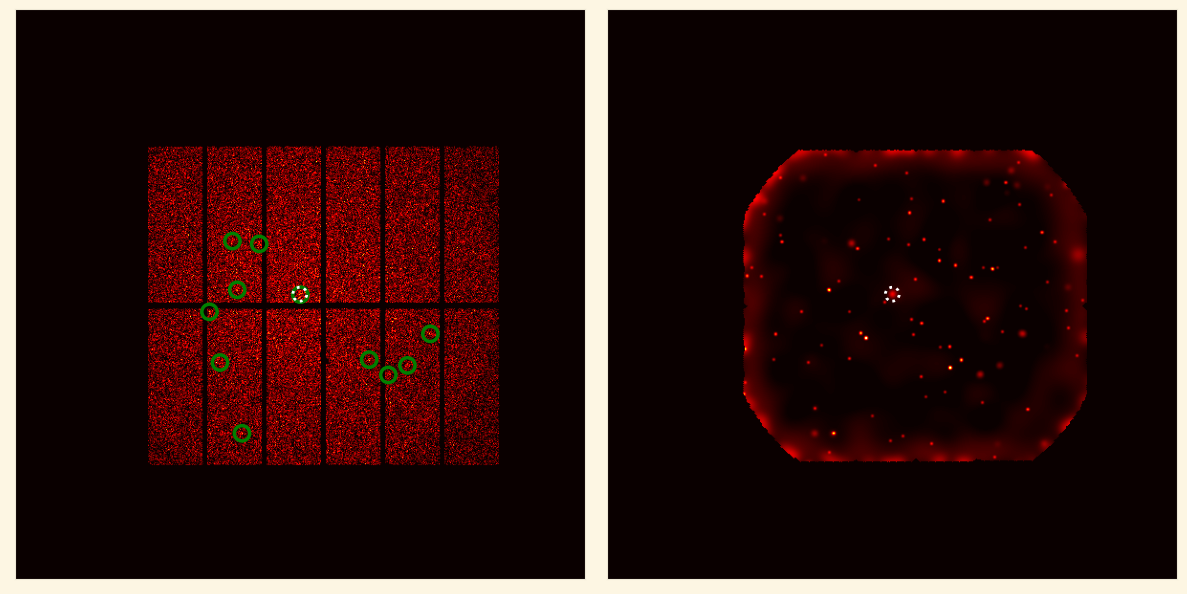

In [6]:
mask_detections = srclist_msvst2d["DET_ML"] > 6
detections = srclist_msvst2d[mask_detections]

norm = simple_norm(xmmexp.image.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.image.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, image_msvst.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [7]:
srclist_msvst, cube_msvst = xmmexp.detect_sources(method="msvst2d1d", sigma_level=3, time_sigma_level=3)

                    INFO     Detecting sources using msvst2d1d algorithm...                          ]8;id=913321;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=498724;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#82\82]8;;\

                    WARNING  No TIMEBINS extension in cube file. Using provided time edges.            ]8;id=144974;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py\image.py]8;;\:]8;id=829862;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py#118\118]8;;\

                    INFO     Existing inpainted cube loaded!                                        ]8;id=217083;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=606463;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#196\196]8;;\

                    INFO     Denoising cube using 2D+1D MSVST...                            ]8;id=891563;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=423554;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#181\181]8;;\

[02/10/23 18:56:39] WARNING  No TIMEBINS extension in cube file. Using provided time edges.            ]8;id=650792;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py\image.py]8;;\:]8;id=749231;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py#118\118]8;;\

                    INFO     Finding peaks in denoised cube...                              ]8;id=215635;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=291838;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#197\197]8;;\

                    INFO     Extracting counts in optimized time intervals for 2043         ]8;id=144691;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=927715;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#218\218]8;;\
                             sources...                                                                            

                    INFO     Calculating background cube                                            ]8;id=278196;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=259341;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#248\248]8;;\

[02/10/23 18:57:12] INFO     Extracting light-curves...                                               ]8;id=59023;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=166820;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[02/10/23 19:00:09] INFO     Calculating fluxes...                                          ]8;id=110915;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=433289;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#224\224]8;;\

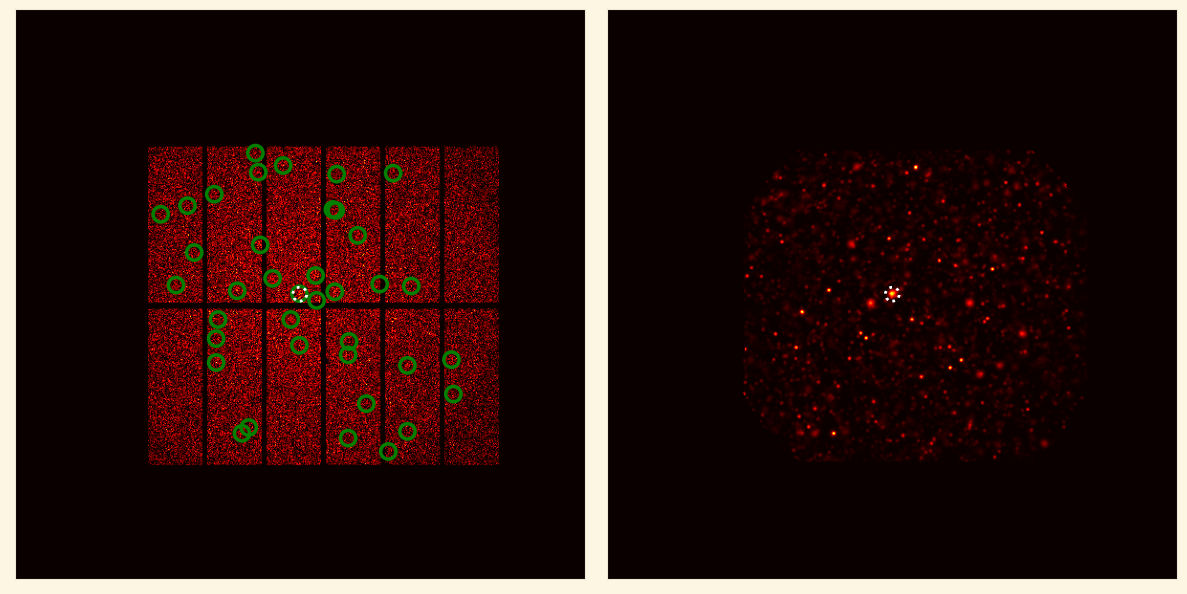

In [8]:
mask_detections = srclist_msvst["DET_ML"] > 6
detections = srclist_msvst[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "asinh")

fig = plt.figure(figsize=(12, 6))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst.time_integrated.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

In [9]:
srclist_msvst2, cube_msvst2 = xmmexp.detect_sources(method="msvst2d1d", sigma_level=4, time_sigma_level=4)

[02/10/23 19:00:10] INFO     Detecting sources using msvst2d1d algorithm...                          ]8;id=317473;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py\exposure.py]8;;\:]8;id=440331;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/exposure.py#82\82]8;;\

                    INFO     Denoising cube using 2D+1D MSVST...                            ]8;id=945669;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=30700;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#181\181]8;;\

[02/10/23 19:08:21] WARNING  No TIMEBINS extension in cube file. Using provided time edges.            ]8;id=174445;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py\image.py]8;;\:]8;id=183662;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/image.py#118\118]8;;\

                    INFO     Finding peaks in denoised cube...                              ]8;id=867595;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=401908;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#197\197]8;;\

                    INFO     Extracting counts in optimized time intervals for 162          ]8;id=196331;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=818546;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#218\218]8;;\
                             sources...                                                                            

[02/10/23 19:08:22] INFO     Extracting light-curves...                                               ]8;id=435562;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py\counts.py]8;;\:]8;id=850524;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/counts.py#106\106]8;;\

[02/10/23 19:08:36] INFO     Calculating fluxes...                                          ]8;id=235835;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py\source_detection.py]8;;\:]8;id=380983;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/statix/source_detection.py#224\224]8;;\

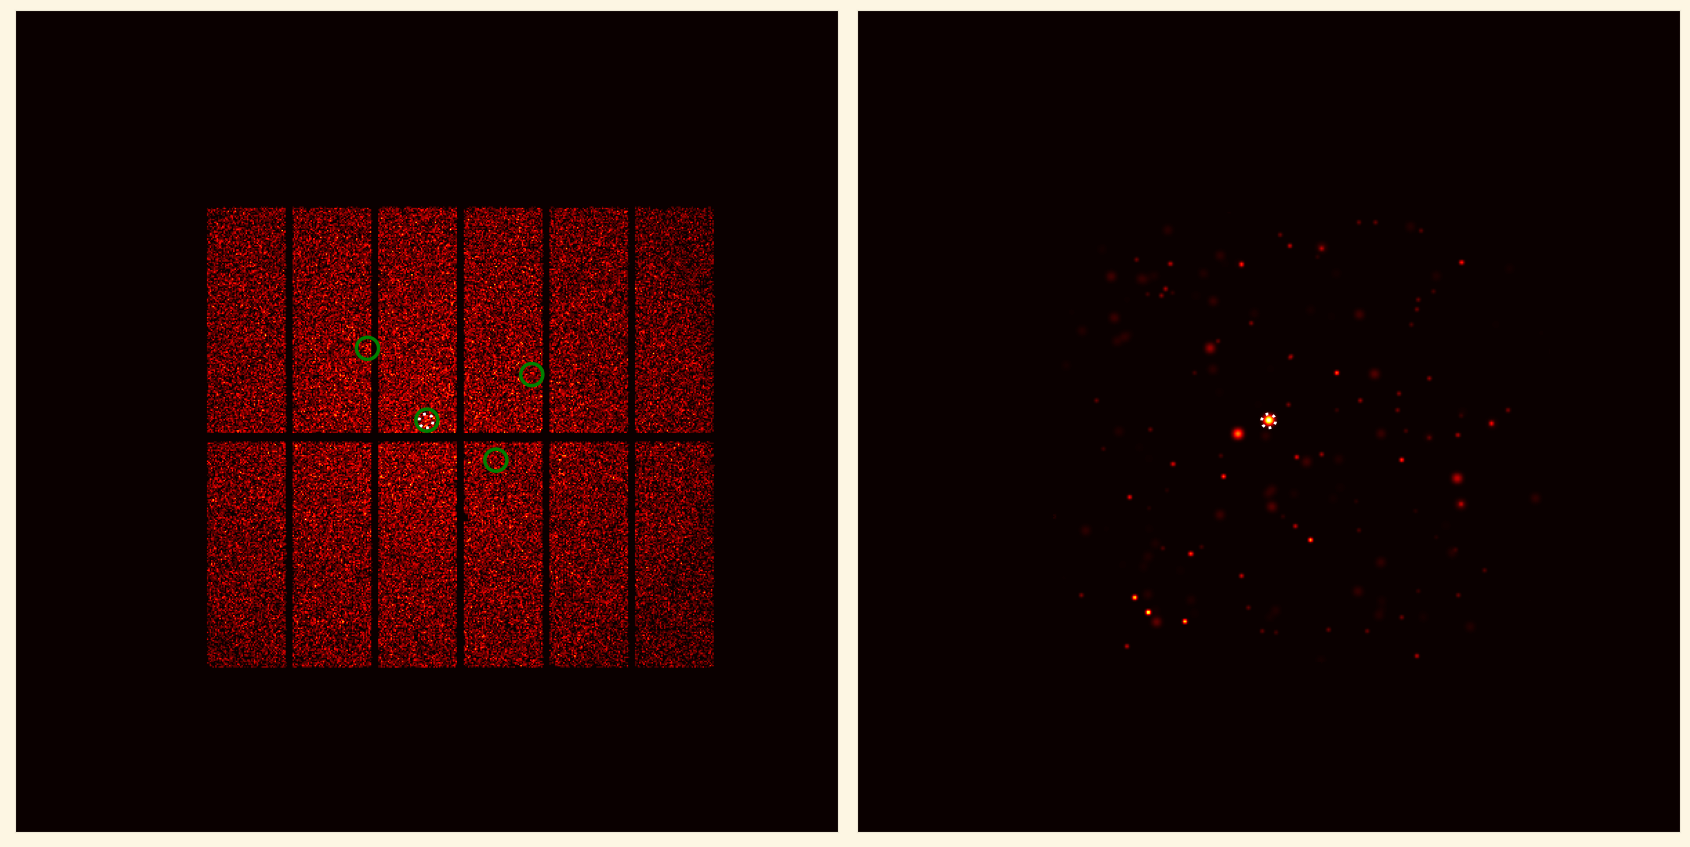

In [10]:
mask_detections = srclist_msvst2["DET_ML"] > 6
detections = srclist_msvst2[mask_detections]

norm = simple_norm(xmmexp.cube.time_integrated.data, "linear")

fig = plt.figure(figsize=(17, 9))
ax = plt.subplot(121)
plot_image(ax, xmmexp.cube.time_integrated.data, use_norm=False, cmap="hot", srclist=detections)
source_marker(ax, spc)

ax = plt.subplot(122)
plot_image(ax, cube_msvst2.time_integrated.data, use_norm=False, cmap="hot")
source_marker(ax, spc)

plt.tight_layout()
plt.show()

(-0.5, 39.5, -0.5, 39.5)

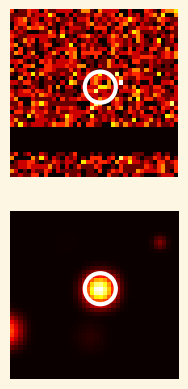

In [11]:
xmmexp.cube.time_integrated.data

ds = 20
center_data = xmmexp.cube.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]
center_msvst = cube_msvst2.time_integrated.data[int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds]

plt.subplot(221)
plt.imshow(center_data, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

plt.subplot(223)
plt.imshow(center_msvst, origin="lower", cmap="hot")
plt.scatter(ds + 1, ds + 1, marker="o", edgecolor="w", s=500, c="none", linewidths=3)
plt.axis("off")

In [12]:
norm_data = simple_norm(center_data, "linear")
norm_msvst = simple_norm(center_msvst, "asinh")

ds = 20
center_data = xmmexp.cube.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]
center_msvst = cube_msvst2.data[:, int(spc[0])-ds:int(spc[0])+ds, int(spc[1])-ds:int(spc[1])+ds+1]

lc = detections[2]["LC"]
lc_bb = detections[2]["LC_BB"]


fig, ax = plt.subplot_mosaic(
    [['A', 'C'], ['B', 'C']], width_ratios=[1,3], constrained_layout=True, figsize=(11, 5)
)
plot_lightcurve(ax["C"], lc, lc_bb)

ims = []
for frame, frame_msvst in zip(center_data, center_msvst):
    ims_frame = []

    im = ax["A"].imshow(frame, origin="lower", cmap="hot", norm=norm_data, animated=True)
    ax["A"].set_axis_off()
    ims_frame.append(im)

    im = ax["B"].imshow(frame_msvst, origin="lower", cmap="hot", norm=norm_msvst, animated=True)
    ax["B"].set_axis_off()
    ims_frame.append(im)
    
    im = ax["C"].axvline(len(ims), ls="--", color="C4")
    ims_frame.append(im)

    ims.append(ims_frame)

plt.close()

ani = animation.ArtistAnimation(fig, ims, interval=300, blit=True, repeat_delay=1000)
HTML(ani.to_jshtml())

[02/10/23 19:08:37] INFO     Animation.save using <class 'matplotlib.animation.HTMLWriter'>       ]8;id=62407;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=824186;file:///home/ruizca/.conda/envs/statix/lib/python3.10/site-packages/matplotlib/animation.py#1042\1042]8;;\